In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_boston

In [7]:
data = load_boston()

In [10]:

x = data.data
y = data.target

In [12]:
print(x.shape,y.shape)

(506, 13) (506,)


In [16]:
df = pd.DataFrame(x)
df.columns = data.feature_names

In [18]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
u = np.mean(x,axis = 0)
std = np.std(x,axis = 0)




In [20]:
x = (x-u)/std

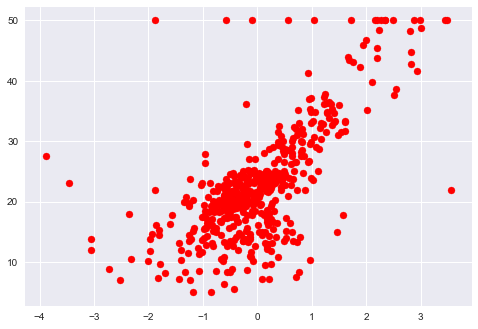

In [29]:
plt.style.use('seaborn')
plt.scatter(x[:,5],y,color = 'red')
plt.show()

In [30]:
ones = np.ones((x.shape[0],1))
x = np.hstack((ones,x))
print(x.shape)

(506, 14)


In [50]:
def hypothesis(x,theta):
    
    y_ = 0
    m  = x.shape[0]
    for i in range(m):
        y_ += (theta[i]*x[i])
    return y_
def error(x,y,theta):
    e = 0
    m = x.shape[0]
    for  i in range(m):
        y_ = hypothesis(x[i],theta)
        
        e += (y[i]-y_)**2
    return e/m
def gradient(x,y,theta):
    
    m,n = x.shape
    grad = np.zeros((n,))
    for j in range(n):
        for i in range(m):
            y_ = hypothesis(x[i],theta)
            
            grad[j] += (y_ - y[i])*x[i][j]
    return grad/m

def gradientdescent(x,y,learning_rate = 0.1,maxitr = 300):
    m,n = x.shape
    theta = np.zeros((n,))
    error_list = []
    for i in range(maxitr):
        e = error(x,y,theta)
        error_list.append(e)
        
        grad = gradient(x,y,theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
    
    return theta,error_list

In [51]:
theta,error_list = gradientdescent(x,y)

In [34]:
theta

array([ 0.59635496, -0.24748741, -0.29085565,  0.06902117, -0.16256551,
        0.0942981 , -0.21633795,  0.25925429, -0.36571258, -0.58612322,
       -0.47899929,  0.70159124,  0.26302351, -0.39899626])

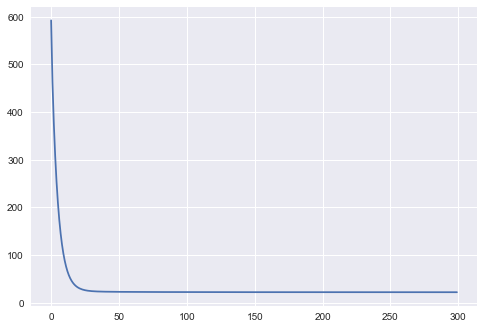

In [52]:
plt.plot(error_list)

In [53]:
y_  = []
m  = x.shape[0]

for i in range(m):
    pred = hypothesis(x[i],theta)
    y_.append(pred)

In [54]:
y_ = np.array(y_)

In [55]:
def r2_score(y,y_):
    num = np.sum((y - y_)**2)
    denom = np.sum((y - y.mean())**2)
    score = (1- num/denom)
    return score*100

In [56]:
r2_score(y,y_)

74.04541323942743

In [72]:
def hypothesis(x,theta):
    return np.dot(x,theta)
def error(x,y,theta):
    e = 0
    y_ =hypothesis(x,theta)
    e = np.sum((y - y_)**2)
    m = x.shape[0]
    
    return e/m
def gradient(x,y,theta):
    m = x.shape[0]
    
    y_ = hypothesis(x,theta)
    
    grad = np.dot(x.T,(y_ - y))
    
    return grad/m
def gradientDescent(x,y,learining_rate = 0.1,maxitr = 300):
    
    n = x.shape[1]
    
    theta = np.zeros((n,))
    
    error_list = []
    for i in range(maxitr):
        e = error(x,y,theta)
        error_list.append(e)
        grad = gradient(x,y,theta)
        theta = theta - learining_rate*grad
    
    return theta,error_list

In [73]:
theta,error_list = gradient_descent(x,y)

In [59]:
theta

array([-2.21732734e+47,  1.04861855e+62, -1.07102883e+62,  1.44859428e+62,
        2.10701762e+60,  1.43263317e+62, -7.90763755e+61,  1.31069526e+62,
       -1.34359428e+62,  1.33627719e+62,  1.41431779e+62,  8.56366036e+61,
       -8.48135727e+61,  1.29435388e+62])

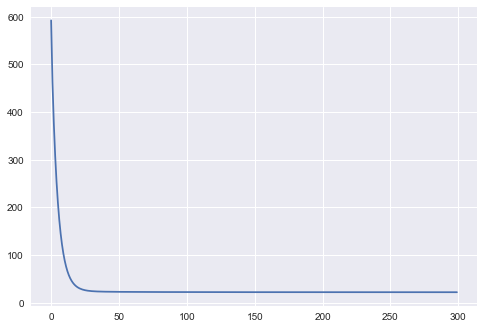

In [74]:
plt.plot(error_list)

In [75]:
y_ = hypothesis(x,theta)
r2_score(y,y_)

74.04541323942742